In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from matplotlib import pyplot as plt

### 1. Download data for the gold ETF

In [4]:
date = '20150101'
gld = pdr.get_data_yahoo('GLD',start=date)
gld.drop('Adj Close',axis=1, inplace=True)

####  2. Add MA and instantaneous rate of return

In [5]:
gld['9_day']=gld.Open.rolling(9).mean()
gld['21_day']=gld.Open.rolling(21).mean()
gld['Return']= np.log(gld.Close).diff()
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2015-01-02,114.800003,112.320000,112.489998,114.080002,7109600,NaN,NaN,NaN
2015-01-05,116.000000,114.730003,114.779999,115.800003,8177400,NaN,NaN,0.014965
2015-01-06,117.500000,115.800003,116.220001,117.120003,11238300,NaN,NaN,0.011334
2015-01-07,116.879997,116.169998,116.470001,116.430000,6434200,NaN,NaN,-0.005909
2015-01-08,116.870003,115.849998,116.449997,115.940002,7033700,NaN,NaN,-0.004217


In [6]:
gld.dropna(inplace=True)
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2015-02-02,123.160004,121.820000,121.839996,122.419998,8885200,123.357777,120.210000,-0.008378
2015-02-03,121.760002,120.559998,121.739998,121.050003,8255900,122.975555,120.650476,-0.011254
2015-02-04,122.220001,120.919998,121.629997,121.580002,5386700,122.593332,120.976666,0.004369
2015-02-05,121.830002,120.610001,120.980003,121.790001,6879900,122.209999,121.203333,0.001726
2015-02-06,119.519997,117.949997,119.150002,118.639999,13206900,121.745555,121.330952,-0.026205


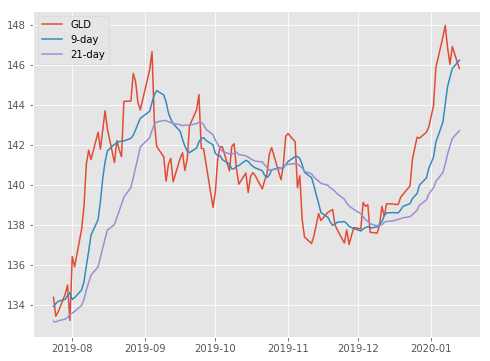

In [8]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(gld.Close[-120:], label='GLD')
    plt.plot(gld['9_day'][-120:],label='9-day')
    plt.plot(gld['21_day'][-120:],label='21-day')
    plt.legend(loc=2)

#### 4. Code regime --always long or short

In [9]:
gld['regime']= np.where(gld['9_day']>gld['21_day'],1,-1)

#### 5. Calculate Return

In [10]:
gld['strat_return']=gld.Return*gld.regime
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return,regime,strat_return
Date,,,,,,,,,,
2015-02-02,123.160004,121.820000,121.839996,122.419998,8885200,123.357777,120.210000,-0.008378,1,-0.008378
2015-02-03,121.760002,120.559998,121.739998,121.050003,8255900,122.975555,120.650476,-0.011254,1,-0.011254
2015-02-04,122.220001,120.919998,121.629997,121.580002,5386700,122.593332,120.976666,0.004369,1,0.004369
2015-02-05,121.830002,120.610001,120.980003,121.790001,6879900,122.209999,121.203333,0.001726,1,0.001726
2015-02-06,119.519997,117.949997,119.150002,118.639999,13206900,121.745555,121.330952,-0.026205,1,-0.026205


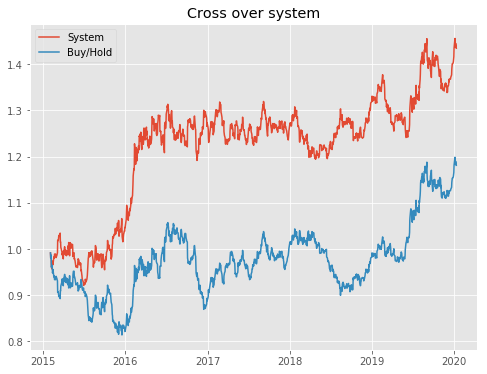

In [14]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(np.exp(gld.strat_return.cumsum()),label='System')
    plt.plot(np.exp(gld.Return.cumsum()),label='Buy/Hold')
    plt.legend()
    plt.title('Cross over system')

#### 7. Numerically

In [17]:
print("System total retuen: {:>10.2%}".format(np.exp(gld.strat_return.sum())))
print("Buy/Hold total return :{:>10.2%}".format(np.exp(gld.Return.sum())))

System total retuen:    143.46%
Buy/Hold total return :   118.12%
